<a href="https://colab.research.google.com/github/LikeMattorSomething/FutureTalentsProjects/blob/main/GraceDataMLTests_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data PreProcessing

In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


GraceData = pd.read_csv("/content/drive/MyDrive/Future Talents Data/Grace_All years combined 08-07-2025.csv")

GraceData.info

GraceData = GraceData[GraceData['Diabetes'] != '#NULL!'] # Removed bad data with no diabetes
GraceData = GraceData[GraceData['Diabetes'] != '-1']

DiabeticSamples = GraceData[GraceData["Diabetes"] == '2']

GraceData['Country'] = pd.factorize(GraceData['Country'])[0] + 1 # Converts 'Country' column to numerical

X = GraceData.drop(columns=["Diabetes","seriali"])
y = GraceData["Diabetes"]


# OVERSAMPLING

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)



print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

(8418, 51)
(8418,)


# Models

In [106]:
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score


# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ModelSelection = int(input("1 nearest neighbour, 2 decision tree, 3 random forest: "))
DefaultParameters = int(input("1 Default Parameters, 2 Grid Search: "))

if ModelSelection == 1:
  if DefaultParameters == 2:
    parameters = {"n_neighbors":range(1,30)}
  else:
    parameters = {}
  modelType = KNeighborsClassifier()#weights="distance")

elif ModelSelection == 2:
  if DefaultParameters == 2:
    parameters = {"max_depth":range(1,30),'max_features': range(1,30)} # Parameters for decision tree
  else:
    parameters = {}
  modelType = DecisionTreeClassifier()

elif ModelSelection == 3:
  if DefaultParameters == 2:
    parameters = {"n_estimators": range(1,10),"max_depth": range(1,30),"max_features": range(1,30)} # Parameters for random forest (estimators 181)
  elif DefaultParameters == 3:
    parameters = {'max_depth': (27,28), 'max_features': (1,2), 'n_estimators': (8,9)}
  else:
    parameters = {}
  modelType = RandomForestClassifier(random_state=40,verbose=1)

else:
  print("Invalid input")

GSD = GridSearchCV(modelType,parameters, scoring='f1_micro')

GSD.fit(X_train_scaled,y_train) # Fit on scaled data
print("Accuracy")
print(GSD.best_estimator_.score(X_test_scaled,y_test)) # Score on scaled data
print("F1 score")
print(f1_score(GSD.predict(X_test_scaled),y_test,average='macro'))
print(GSD.best_params_)


1 nearest neighbour, 2 decision tree, 3 random forest: 1
1 Default Parameters, 2 Grid Search: 1
Accuracy
0.9441805225653207
F1 score
0.944083906637899
{}


# Confusion Matrix

RandomForestClassifier(random_state=40, verbose=1)


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


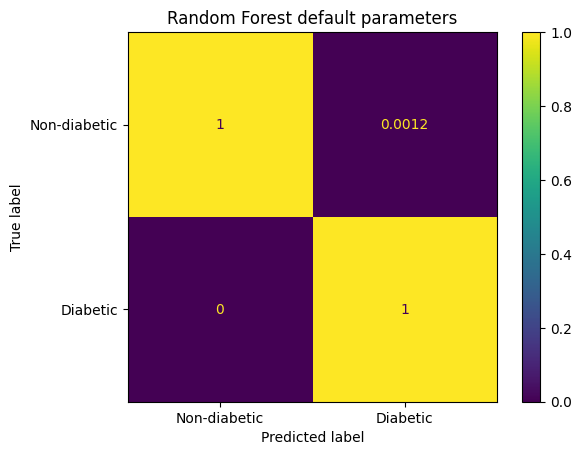


0.9994061757719715


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


In [102]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

PredictedResults = GSD.predict(X_test_scaled) # Predict on scaled data
ActualResults = y_test

CMlabels = ['1','2'] # Labels to match the values in y_test
DisplayLabels = ["Non-diabetic","Diabetic"] # Labels to display on the plot

cm = confusion_matrix(ActualResults, PredictedResults)
disp = ConfusionMatrixDisplay.from_estimator(GSD, X_test_scaled, y_test, normalize="true", labels=CMlabels, display_labels=DisplayLabels) # Display using scaled data and updated display_labels



#plt.title("Confusion Matrix")
print(modelType)
plt.title("Confusion Matrix")
plt.title("Random Forest default parameters")
plt.show()

print("")
print(GSD.best_estimator_.score(X_test_scaled,y_test))

# myClassifiers = pd.Series(GSD.best_estimator_.feature_importances_, index=X_train.columns)

# ROC Curve and AUC

AUC - ROC Score: 0.98
Accuracy: 0.94
Precision: 0.90
Recall: 1.00
F1 Score: 0.95
[0.         0.03395785 0.07259953 0.11007026 0.19203747 1.        ]
[0. 1. 1. 1. 1. 1.]


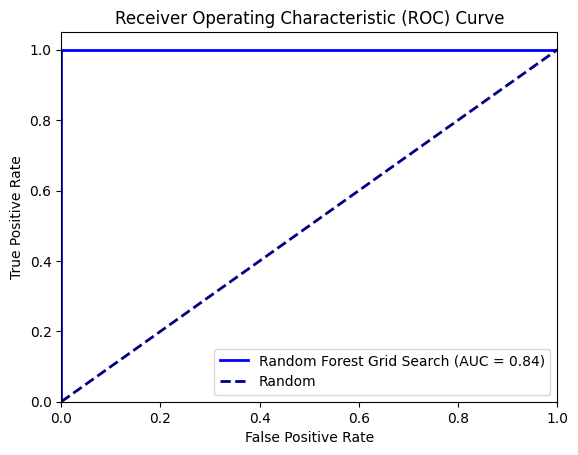

In [122]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = GSD.predict_proba(X_test_scaled)[:, 1]
y_pred = GSD.predict(X_test_scaled)


roc_auc = roc_auc_score(y_test, y_pred_proba)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='2')
recall = recall_score(y_test, y_pred, pos_label='2')
f1 = f1_score(y_test, y_pred, pos_label='2')

print(f"AUC - ROC Score: {roc_auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='2')
roc_auc_plot = auc(fpr, tpr)



print(fpr)
print(tpr)


RFGSfpr = [0., 0., 0., 0.00117096, 0.01288056, 0.05386417,
       0.1557377, 0.44496487, 1.]
RFGStpr = [0., 0.98313253, 1., 1., 1., 1.,
       1., 1., 1.]





roc_auc_plot_OverSamp = auc(NonOversampled['fpr'],NonOversampled['tpr'])

plt.figure()
#plt.plot(fpr, tpr, color='darkorange', lw=2, label='Oversampled (area = %0.2f)' % roc_auc_plot)

plt.plot(RFGSfpr, RFGStpr, color='blue', lw=2, label='Random Forest Grid Search (AUC = %0.2f)' % roc_auc_plot_OverSamp)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = 'Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plotting Performance

/tmp/ipython-input-896860665.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar(y, testDF.iloc[0][y], width,color='#1f77b4')
/tmp/ipython-input-896860665.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar(y+width, testDF.iloc[1][y], width,color='#ff7f0e')


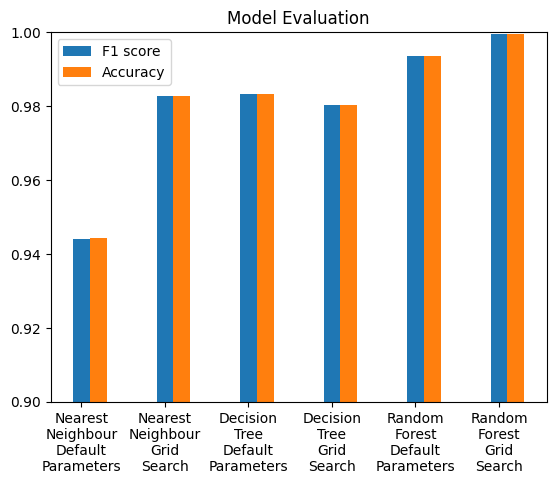

In [97]:
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

#print(classification_report(y_test,GSD.predict(X_test_scaled)))


ModelPerformanceResults = {'Nearest Neighbour Default Parameters': [0.944083906637899,0.9441805225653207],'Nearest Neighbour Grid Search':[0.9827789455718623,0.9827790973871734],'Decision Tree Default Parameters':[0.9833728278041074,0.9833729216152018],'Decision Tree Grid Search':[0.9804032407366593,0.9804038004750594],'Random Forest Default Parameters':[0.9934675441965211,0.9934679334916865],'Random Forest Grid Search':[0.9994060649794538,0.9994061757719715]}
testDF = pd.DataFrame(data=ModelPerformanceResults)


width = 0.2
x = np.arange(6)

for y in range(6):
  # print(testDF.iloc[0][y])
  # print(testDF.iloc[1][y])

  plt.bar(y, testDF.iloc[0][y], width,color='#1f77b4')
  plt.bar(y+width, testDF.iloc[1][y], width,color='#ff7f0e')



#plt.bar(x, ModelPerformanceResults['With Oversampling'], width)
#plt.bar(x+width, ModelPerformanceResults['Random Forest'], width)


#plt.xticks(x, ['Nearest Neighbour Default Parameters','Nearest Neighbour Grid Search','Decision Tree Default Parameters','Decision Tree Grid Search','Random Forest Default Parameters','Random Forest Grid Search'],rotation=90)
plt.xticks(x, ['Nearest\nNeighbour\nDefault\nParameters','Nearest\nNeighbour\nGrid\nSearch','Decision\nTree\nDefault\nParameters','Decision\nTree\nGrid\nSearch','Random\nForest\nDefault\nParameters','Random\nForest\nGrid\nSearch'])

plt.legend(['F1 score','Accuracy'])

plt.ylim(0.9,1)

plt.title("Model Evaluation")
plt.show()
